# Average profile for gas

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
%matplotlib inline

In [2]:
#import csv - DONT RUN THIS
gas = pd.read_csv('edrp_gas.csv')

In [3]:
gas_less = gas.sample(frac=0.05).reset_index(drop=True)
gas_less['ADVANCEDATETIME'] = pd.to_datetime(gas_less['ADVANCEDATETIME'], format = '%d%b%y:%H:%M:%S')
gas_less.to_csv('sample_gas')

Using new sampled data, 5% of the overall dataset, model an average day and then an average summer and winter day scaled to the expected demand

In [3]:
gas = pd.read_csv('sample_gas')


In [4]:
gas.head()

,Unnamed: 0,ANON_ID,ADVANCEDATETIME,HH,GASKWH
0,0,4396,2008-08-03 14:30:00,29,0.01
1,1,8439,2009-04-05 02:30:00,5,0.00
2,2,14804,2009-05-08 07:30:00,15,0.20
3,3,13707,2009-03-12 04:00:00,8,0.00
4,4,10462,2010-05-12 12:00:00,24,0.00


In [5]:
gas['ADVANCEDATETIME'] = pd.to_datetime(gas['ADVANCEDATETIME'], format = '%Y-%m-%d %H:%M:%S')
gas['Month'] = gas['ADVANCEDATETIME'].dt.month
gas['Time'] = gas['ADVANCEDATETIME'].dt.time

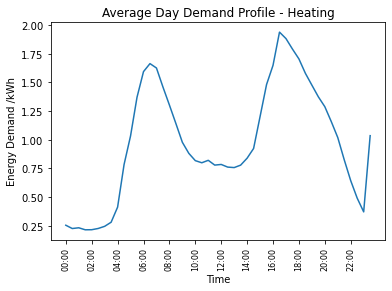

47.08116073944579

In [6]:
#average day over all data:
anyday = gas.groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
time = anyday.index
time = [x.strftime("%H:%M") for x in time]
plt.plot(time, anyday)
plt.xticks(time[::4], fontsize=8, rotation=90)
plt.title('Average Day Demand Profile - Heating')
plt.xlabel('Time')
plt.ylabel('Energy Demand /kWh')
plt.show()
overallkWh = anyday.sum()
overallkWh

The data gives an average daily usage of 47.08kWh/household. The demand figure we are using gives a 22.23kWh/household as the daily usage. Our demand has - 9.4GWh general electricity, 8.5GWh from EVs, 9.9-10.6GWh heating giving 7.36, 6.65 & 7.75-8.30 kWh/household daily respecitvely.
Taking the heating demand as 8kWh/household daily we will scale the data by 8/47 to create the summer and winter graphs. 

In [7]:
byMonth = gas.groupby(pd.Grouper(key='Month'))
groups = dict(list(byMonth))
Jan = groups[1].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Feb = groups[2].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Mar = groups[3].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Apr = groups[4].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
May = groups[5].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
June = groups[6].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
July = groups[7].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Aug = groups[8].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Sept = groups[9].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Oct = groups[10].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Nov = groups[11].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
Dec = groups[12].groupby(pd.Grouper(key='Time')).mean()['GASKWH'].sort_index()
winter1 = pd.concat([Dec, Jan, Feb], axis=1)
summer1 = pd.concat([June, July, Aug], axis=1)


In [8]:
winter =  winter1.mean(axis=1)*8/47
summer = summer1.mean(axis=1)*8/47

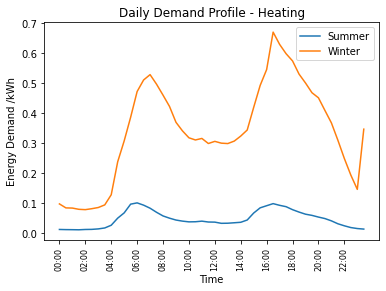

Houshold demand total: Summer = 2.29 kWh/day, Winter = 16.35 kWh/day.


Time
00:00:00    0.012332
00:30:00    0.011830
01:00:00    0.011600
01:30:00    0.011239
02:00:00    0.012288
02:30:00    0.012642
03:00:00    0.014204
03:30:00    0.017339
04:00:00    0.026398
04:30:00    0.050010
05:00:00    0.067537
05:30:00    0.096615
06:00:00    0.100843
06:30:00    0.093273
07:00:00    0.083082
07:30:00    0.069470
08:00:00    0.057366
08:30:00    0.049910
09:00:00    0.043700
09:30:00    0.040096
10:00:00    0.037649
10:30:00    0.038021
11:00:00    0.040002
11:30:00    0.037139
12:00:00    0.036740
12:30:00    0.032797
13:00:00    0.033120
13:30:00    0.034633
14:00:00    0.036218
14:30:00    0.043827
15:00:00    0.067054
15:30:00    0.084372
16:00:00    0.091395
16:30:00    0.098329
17:00:00    0.092736
17:30:00    0.088193
18:00:00    0.078221
18:30:00    0.070251
19:00:00    0.063204
19:30:00    0.059218
20:00:00    0.053588
20:30:00    0.048626
21:00:00    0.040998
21:30:00    0.031307
22:00:00    0.024513
22:30:00    0.018669
23:00:00    0.015389
23:30:00

In [9]:
plt.plot(time, summer, time, winter)
plt.xticks(time[::4], fontsize=8, rotation=90)
plt.legend(['Summer', 'Winter'])
plt.title('Daily Demand Profile - Heating')
plt.xlabel('Time')
plt.ylabel('Energy Demand /kWh')
plt.show()
summerkWh = summer.sum()
winterkWh = winter.sum()
print('Houshold demand total: Summer = %.2f kWh/day, Winter = %.2f kWh/day.' % (summerkWh, winterkWh))
summer